In [106]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")

In [107]:
# Read data
# Lectura del dataset usando como index la primera columna
df = pd.read_csv('properatti_geo.csv', index_col='id')
df.drop(['Unnamed: 0', 'piso', 'habs', 'expensas', 'descripcion', 'ambientes'], axis=1, inplace=True)

In [108]:
df.head()

,barrio_real,total,cubierta,precio,habitaciones_final,pileta,seguridad,parrilla,balcon,cochera,nuevo,geometry,dist_comisarias,dist_subte,dist_trenes,dist_metrobus
id,,,,,,,,,,,,,,,,
2,LINIERS,55.0,55.0,1309.090909,2.0,0,0,0,0,0,0,POINT (-58.5229825 -34.6522615),2133.629728,5444.155315,1512.704661,1578.836380
7,BELGRANO,45.0,40.0,3066.666667,1.0,1,0,0,0,0,0,POINT (-58.443362 -34.5598729),564.095028,1068.595967,585.038122,1019.907337
8,BELGRANO,65.0,60.0,3000.000000,2.0,1,0,0,0,0,0,POINT (-58.443362 -34.5598729),564.095028,1068.595967,585.038122,1019.907337
19,PALERMO,104.0,96.0,3365.384615,3.0,0,0,0,1,0,0,POINT (-58.4058744847 -34.580503566),719.300376,991.604946,794.459912,1500.489635
21,RECOLETA,118.0,73.0,2292.372881,4.0,0,0,0,0,0,0,POINT (-58.4116653 -34.590926),527.672388,300.233682,1938.001717,1494.307836


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15924 entries, 2 to 121217
Data columns (total 16 columns):
barrio_real           15924 non-null object
total                 15924 non-null float64
cubierta              15467 non-null float64
precio                15924 non-null float64
habitaciones_final    14471 non-null float64
pileta                15924 non-null int64
seguridad             15924 non-null int64
parrilla              15924 non-null int64
balcon                15924 non-null int64
cochera               15924 non-null int64
nuevo                 15924 non-null int64
geometry              15924 non-null object
dist_comisarias       15924 non-null float64
dist_subte            15924 non-null float64
dist_trenes           15924 non-null float64
dist_metrobus         15924 non-null float64
dtypes: float64(8), int64(6), object(2)
memory usage: 2.1+ MB


## CONSULTAS

#### División de barrios según precio promedio en tres categorías A, B y C

In [110]:
top = df.groupby('barrio_real')['precio'].mean().sort_values(ascending=False).head(12)
last = df.groupby('barrio_real')['precio'].mean().sort_values(ascending=False).tail(12)

In [111]:
topl = list(top.index.values)
lastl = list(last.index.values)

In [112]:
def cat_barrio(x, top, last):
    if x in top:
        return 'A'
    elif x in last:
        return 'C'
    else: 
        return 'B'
    
df['categoria'] = df['barrio_real'].apply(lambda x: cat_barrio(x, topl, lastl))

### Relación precio - superficies

#### Precio y superficie - Promedios y desvios por categoria de barrio

In [113]:
f = {'precio': ['mean', 'std'], 'total': ['mean', 'std'] }
# retorna el orden de las columnas como son pasadas
df.groupby(['categoria'])['precio', 'total'].agg(f).head()
# al usar el dict en aggfunc ordena las cols segun el dict (alfabeticamente)
df.pivot_table(['precio', 'total'], index=['categoria'], aggfunc=f).head()

precio                  total           
                  mean         std       mean        std
categoria                                               
A          3013.441514  952.801847  71.898518  36.242418
B          2219.232882  550.182225  60.490478  29.452977
C          1868.395064  454.350311  58.006849  24.764286

precio                  total           
                  mean         std       mean        std
categoria                                               
A          3013.441514  952.801847  71.898518  36.242418
B          2219.232882  550.182225  60.490478  29.452977
C          1868.395064  454.350311  58.006849  24.764286

#### Relación precio - superficie por categoria de barrio

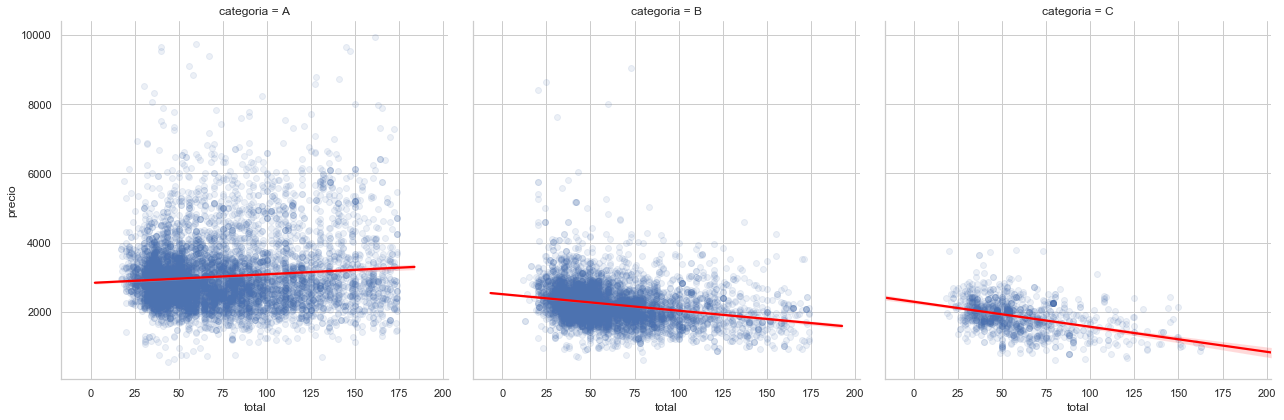

In [114]:
sns.lmplot(x='total', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

### Relación precio - distancias

#### Relación precio - distancia comisaría por categoria

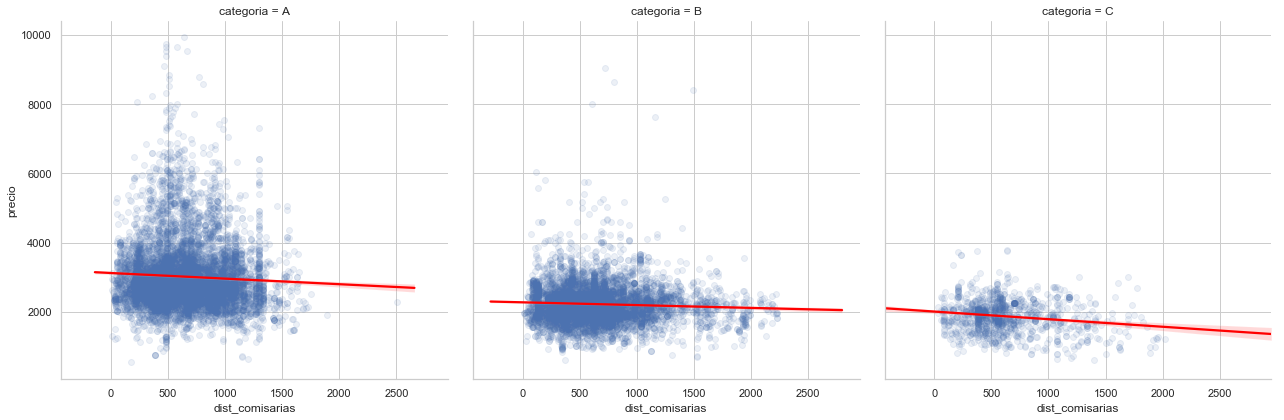

In [115]:
sns.lmplot(x='dist_comisarias', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

#### Relación precio - distancia a estación de subte por categoria

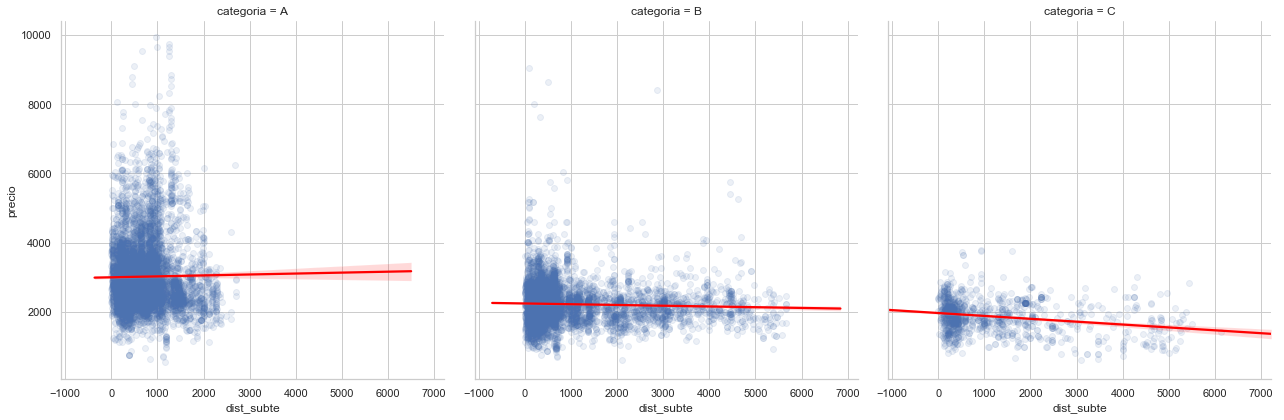

In [116]:
sns.lmplot(x='dist_subte', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

#### Relación precio - distancia a estación de tren por categoria

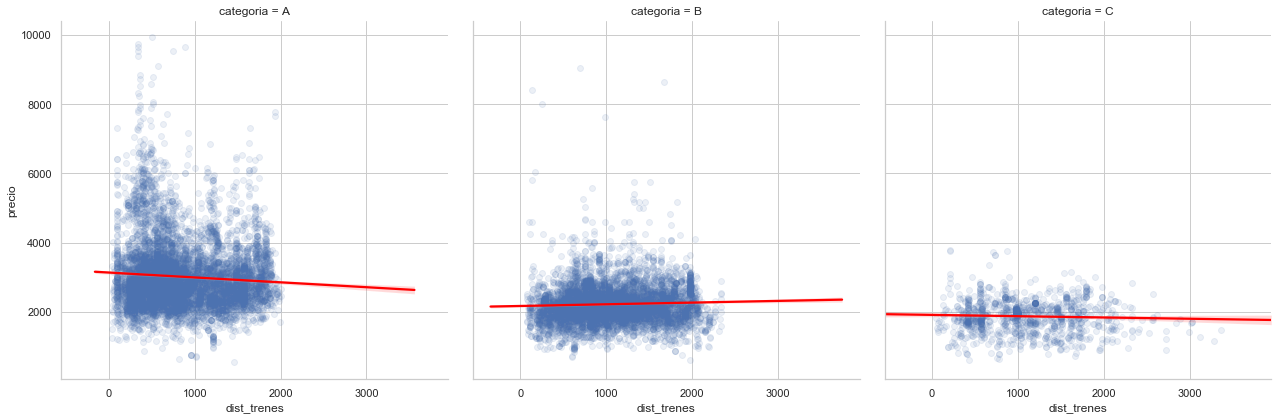

In [117]:
sns.lmplot(x='dist_trenes', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

#### Relación precio - distancia a estación de metrobus por categoria

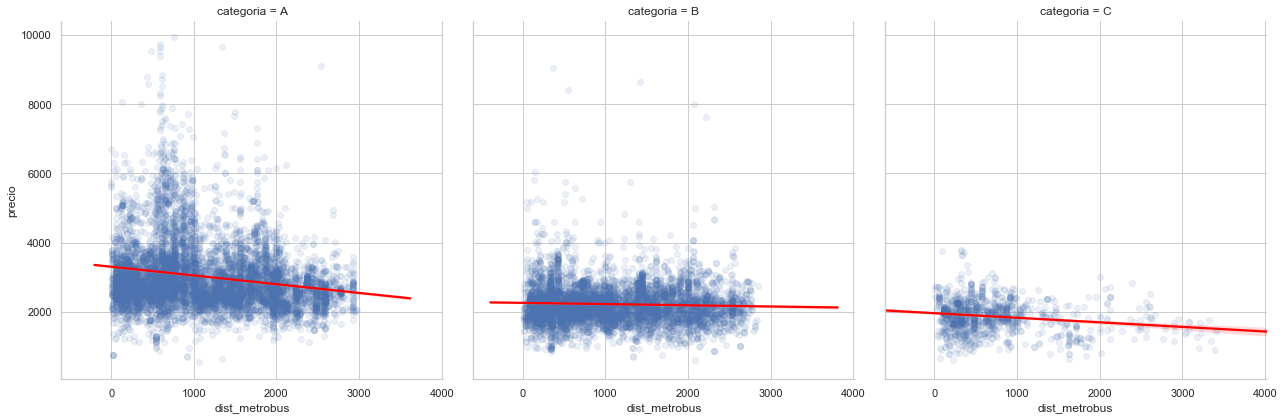

In [118]:
sns.lmplot(x='dist_metrobus', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

### Relación entre precio y amenities 

In [125]:
# acumulación de cantidad de amenities 
df['amenities']=df.loc[:,'pileta':'cochera'].sum(axis=1) 

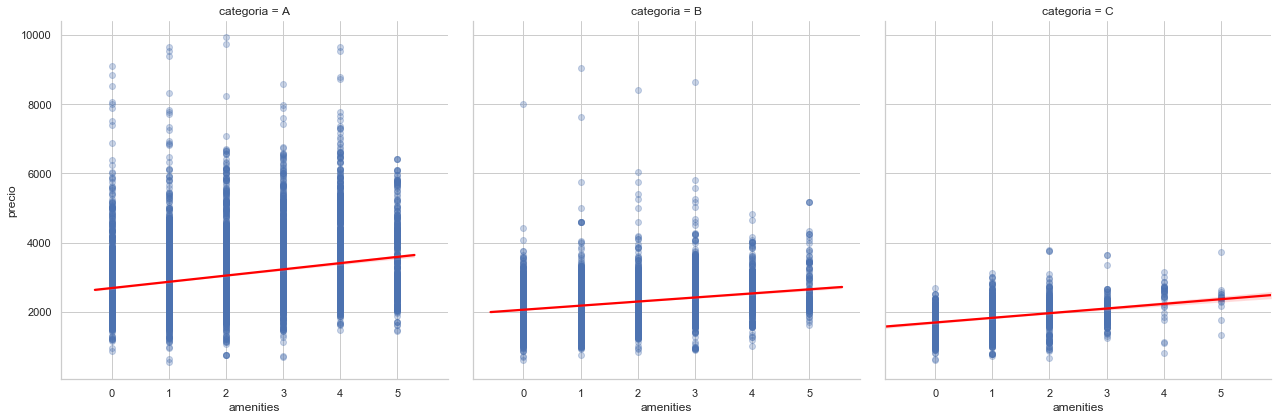

In [131]:
sns.lmplot(x='amenities', y='precio', col='categoria', data=df, col_order=['A', 'B', 'C'],
           height=6, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3});